# Ejercicio 1

Clustering - Kmeans

In [1]:
import numpy as np
from sklearn.datasets import load_digits

import matplotlib.pyplot as plt

## Carga de datos

Vamos a descargar un conjunto de datos que consiste en 1797 imágenes de los dígitos de 
0 a 9 escritos a mano

In [11]:
data, labels = load_digits(return_X_y=True)

print("El conjunto de datos, tiene la siguiente forma: ", data.shape)

El conjunto de datos, tiene la siguiente forma:  (1797, 64)


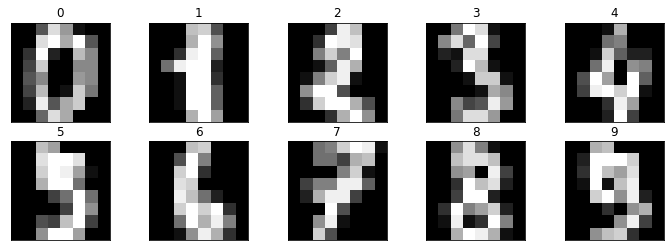

In [12]:
# Visualizaremos los primeros 10 datos para conocer el dataset

figure = plt.figure(figsize=(12, 4))

for i in range(10):
    ax = plt.subplot(2, 5, i + 1)
    ax.imshow(data[i,:].reshape((8,8)), cmap='gray') # La función reshape cambia la forma de cada fila
    ax.set_title(labels[i])
    ax.set_xticks(())
    ax.set_yticks(())    

**Ejercicio 1**

Como siempre empezaremos separando el conjunto de entrenamiento y el de test

In [13]:
from sklearn.model_selection import train_test_split

data, X_test, labels, y_test = train_test_split(data, labels, test_size=0.33, random_state=42)

## Reducción de la dimensionalidad

Para poder observar los datos vamos a proceder a reducir la dimensionalidad de nuestro conjunto. Para ello usaremos la técnica de PCA [enlace](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html?highlight=pca#sklearn.decomposition.PCA) que funciona de manera muy similar a las clases con las que hemos trabajado hasta ahora.

El mètodo constructor `PCA` recibe por paràmetro el número de componentes que queremos conservar, en este caso 2. También podemos llamar al mètodo `fit` y a la función `transform` que es la que se encarga de realizar la transformación propiamente dicha.

**Ejercicio 2**

Transforma la matriz de datos `data` usando PCA para que su dimensionalidad sea de 2. Antes debes escalar los datos

In [34]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
data_sc = sc.fit_transform(data)

pca = PCA(n_components=60)
pca.fit(data)
data_t = pca.transform(data_sc)

#Veamos que forma tienen los nuevos datos

print("Forma de los datos transformados: ", data_t.shape)

Forma de los datos transformados:  (1203, 60)


(60,)


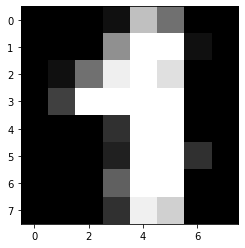

In [35]:
print(data_t[0,:].shape)
data_2 =pca.inverse_transform(data_t[0,:])

plt.imshow(sc.inverse_transform(data_2.reshape(1, -1)).reshape((8,8)), cmap='gray');

In [24]:
sc.inverse_transform(data_2.reshape(1, -1))

array([[ 3.44765821e-15,  4.62145026e-01, -1.74329160e-01,
         1.18608313e+00,  1.19103824e+01,  7.12921724e+00,
        -1.01558791e-01,  1.03982150e-01,  1.16457861e-03,
        -4.76433559e-01,  3.35899033e-01,  8.91265380e+00,
         1.59891585e+01,  1.60461092e+01,  8.49367340e-01,
         3.07561663e-01,  5.24054099e-03,  1.15115918e+00,
         6.86840008e+00,  1.51576176e+01,  1.59882446e+01,
         1.41737038e+01, -1.62440689e-01,  5.89418337e-02,
         1.84431028e-03,  3.86665965e+00,  1.60542557e+01,
         1.60835904e+01,  1.60264261e+01,  1.58902370e+01,
         1.18823974e-02,  1.42241700e-03, -2.05065625e-16,
         1.52370489e-01,  4.65953724e-02,  3.00132975e+00,
         1.59675414e+01,  1.62090017e+01, -1.16488624e-01,
         2.47103592e-16,  4.69052102e-03,  1.23599270e-01,
        -2.36259345e-01,  2.03069846e+00,  1.62512446e+01,
         1.58026547e+01,  3.26747206e+00, -6.77613862e-02,
         1.47399095e-03, -1.95665577e-01,  1.44430293e-0

**Ejercicio 2**

Dibuja los puntos usando un color diferente según su clase. Aunque estamos simulando un problema de clasificación no supervisada usaremos esta "trampa" para poder evaluar como de bien funciona _K-means_ en un problema más complicado de lo normal.

Usa la función `scatter` y como paràmetro `c=labels`

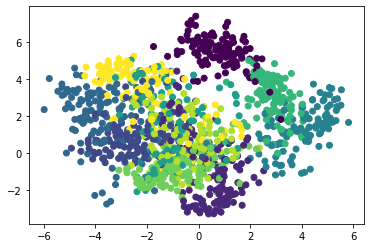

In [7]:
plt.scatter(data_t[:,0],data_t[:,1], c=labels);

**Ejercicio 3**

Busca el mejor número de _clusters_ usando la regla del codo.

C:\Users\gabri\Anaconda3\envs\MADM2019\lib\site-packages\sklearn\cluster\_kmeans.py:1040: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  "KMeans is known to have a memory leak on Windows "


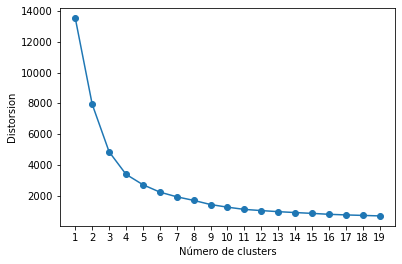

In [8]:
from sklearn.cluster import KMeans
distortions = []

n_clusters = range(1, 20)

for i in n_clusters:
    km = KMeans(n_clusters=i,init='random', max_iter=300, random_state=0)
    km.fit(data_t)
    distortions.append(km.inertia_)

plt.plot(n_clusters, distortions, marker='o')
plt.xlabel('Número de clusters')
plt.ylabel('Distorsion')
plt.xticks(n_clusters)
plt.show();

**Ejercicio 4**

Vamos a visualizar los 10 centroides:

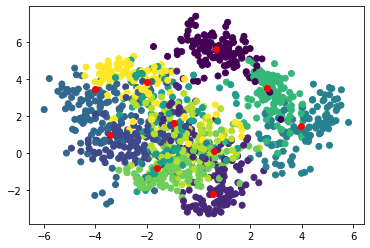

In [11]:
km = KMeans(n_clusters=10,init='random', max_iter=300, random_state=0)
km.fit(data_t)

centroids = km.cluster_centers_

plt.scatter(data_t[:,0],data_t[:,1], c=labels);
plt.scatter(centroids[:,0],centroids[:,1], c="r");
   

**Ejercicio 5**

Usa una SVM con kernel `RBF` para solventar este problema de clasificación de forma supervisada. 

Realiza esta clasificación con la información una vez has aplicado PCA con 2 dimensiones y otra usando las 64 dimensiones originales.